# Setup

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [86]:
df = pd.read_csv('SPAM.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [87]:
nlp = spacy.load('en_core_web_sm')

In [88]:
def clean(msg: str) -> str:
    tmp = msg.lower()
    doc = nlp(tmp)
    tokens = []
    for token in doc:
        if token.lemma_ in ['lt;#&gt', '150p', '10p', 't&c', 't&cs']:
            continue
        if token.is_punct or token.is_stop or token.is_space\
        or token.like_num or token.like_url or token.like_email\
        or token.is_digit:
            continue
        if len(token.lemma_) <= 1:
            continue
        tokens.append(token.lemma_)
    return " ".join(tokens)

In [89]:
df['Cleaned'] = df['Message'].apply(clean)

In [90]:
df

,Category,Message,Cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts tex...
3,ham,U dun say so early hor... U c already then say...,dun early hor
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think go usf live
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,time try contact u. win pound prize claim easy...
5568,ham,Will ü b going to esplanade fr home?,go esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching act like interested buy week give...


# Podział

In [91]:
ham = df.loc[df['Category'] == 'ham', 'Cleaned']
spam = df.loc[df['Category'] == 'spam', 'Cleaned']

In [92]:
all_words = df['Cleaned'].sum().split()
spam_words = spam.sum().split()
ham_words = ham.sum().split()

# Wykresy

In [93]:
def plot(arr: list[str], title: str, filename: str = None):
    top_20 = Counter(arr).most_common(20)
    plt.bar([x[0] for x in top_20], [x[1] for x in top_20])
    plt.rcParams["figure.figsize"] = (8,10)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.savefig(filename)
    plt.show()

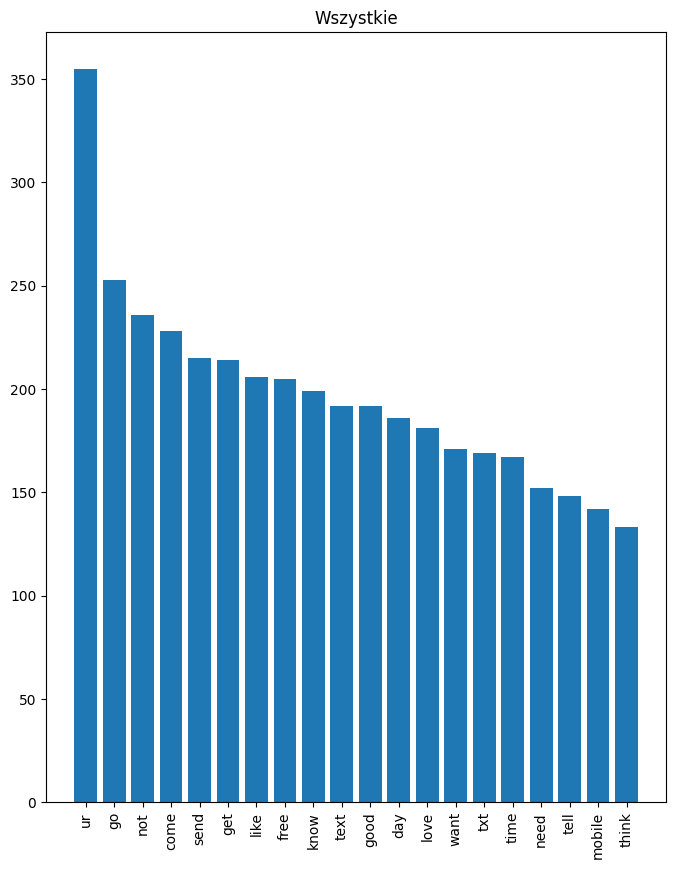

In [94]:
plot(all_words, 'Wszystkie', 'all_plot.png')

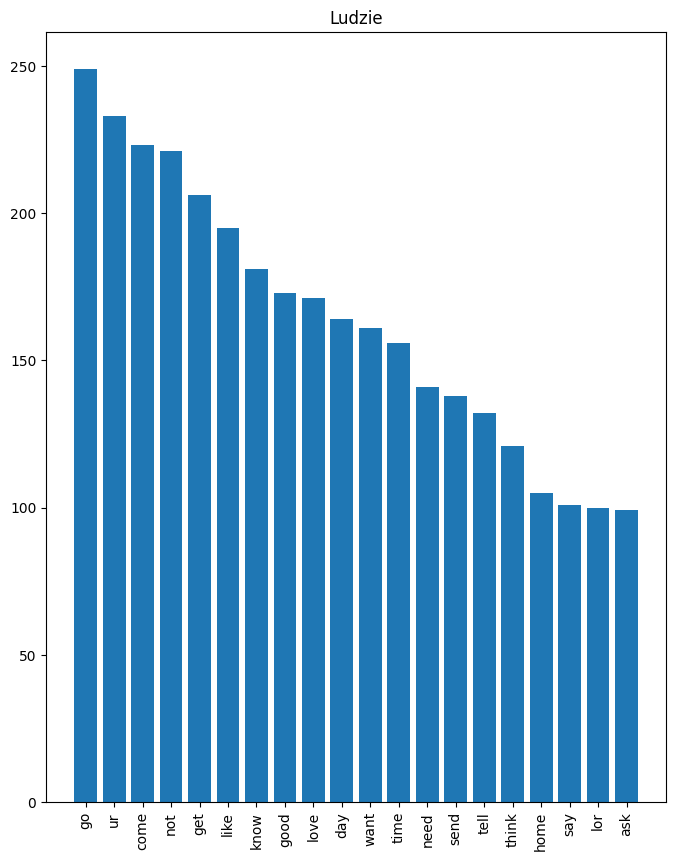

In [95]:
plot(ham_words, 'Ludzie', 'ham_plot.png')

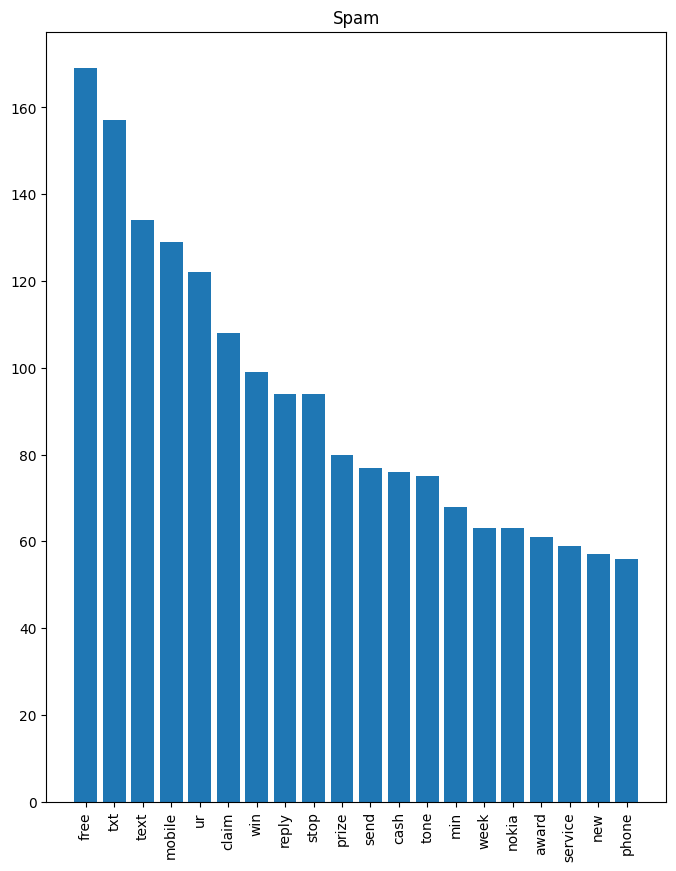

In [96]:
plot(spam_words, 'Spam', 'spam_plot.png')

# Wykluczone

In [97]:
only_spam_words = [x for x in spam_words if x not in ham_words]
only_ham_words = [x for x in ham_words if x not in spam_words]

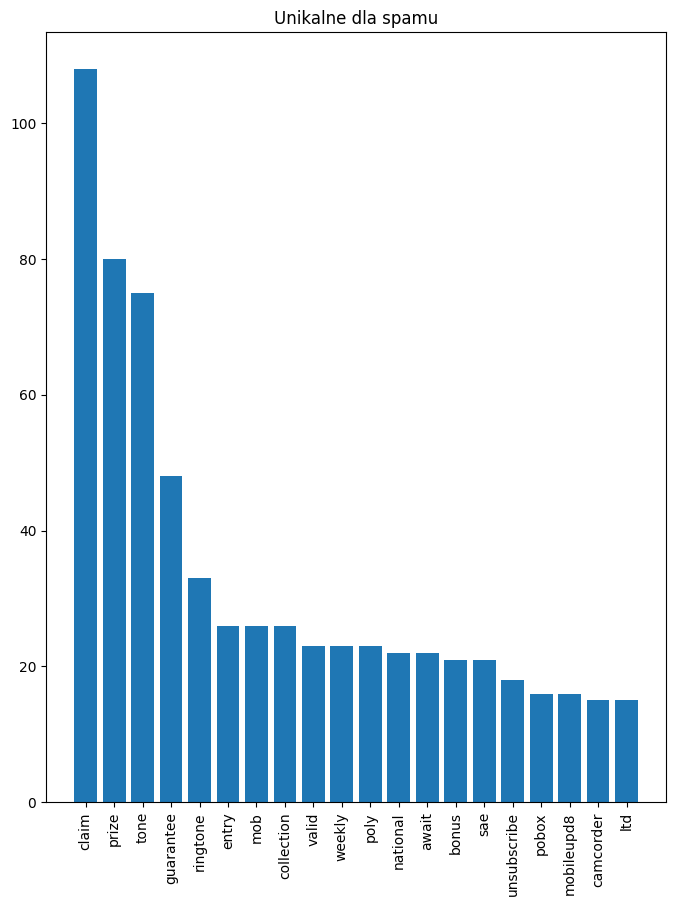

In [98]:
plot(only_spam_words, 'Unikalne dla spamu', 'only_spam_plot.png')

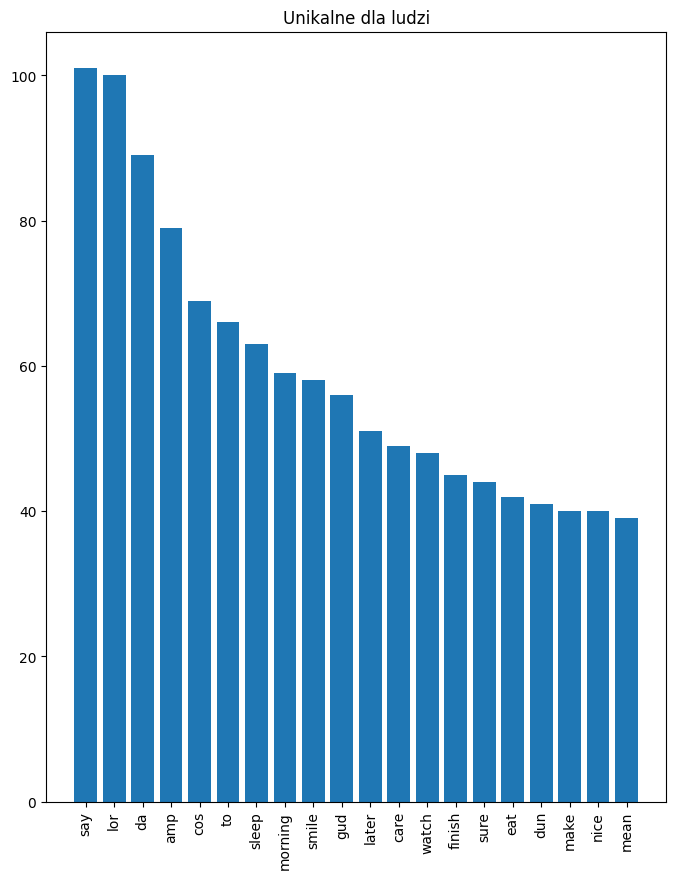

In [99]:
plot(only_ham_words, 'Unikalne dla ludzi', 'only_ham_plot.png')

# WordCloud

In [100]:
def wordcloud(arr: list[str], title: str, filename: str = None):
    text = " ".join(arr)
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          stopwords=STOPWORDS,
                          min_font_size=10,
                          scale=1.25).generate(text)
    wordcloud.to_file(filename)
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title)
    plt.imshow(wordcloud)
    plt.show()

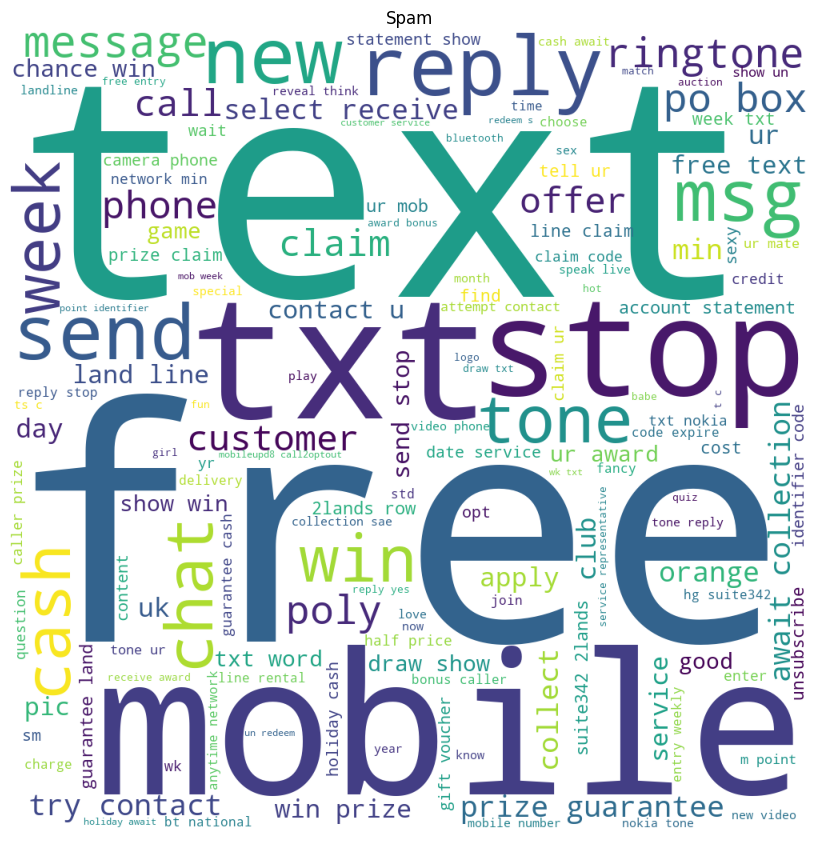

In [101]:
wordcloud(spam_words, 'Spam', 'spam_wordcloud.png')

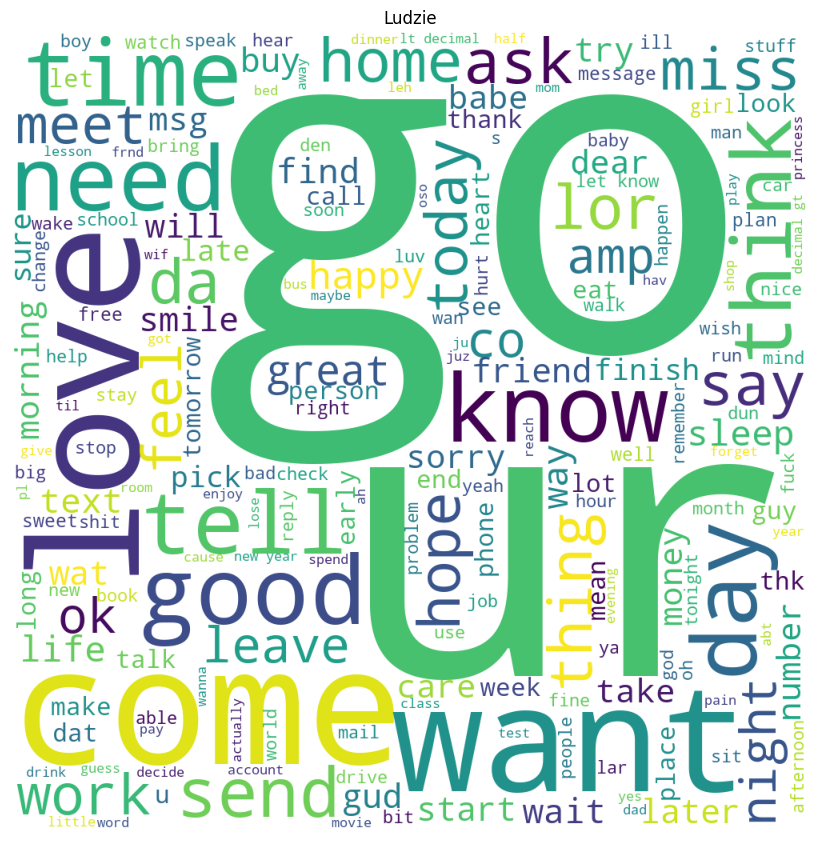

In [102]:
wordcloud(ham_words, 'Ludzie', 'ham_wordcloud.png')

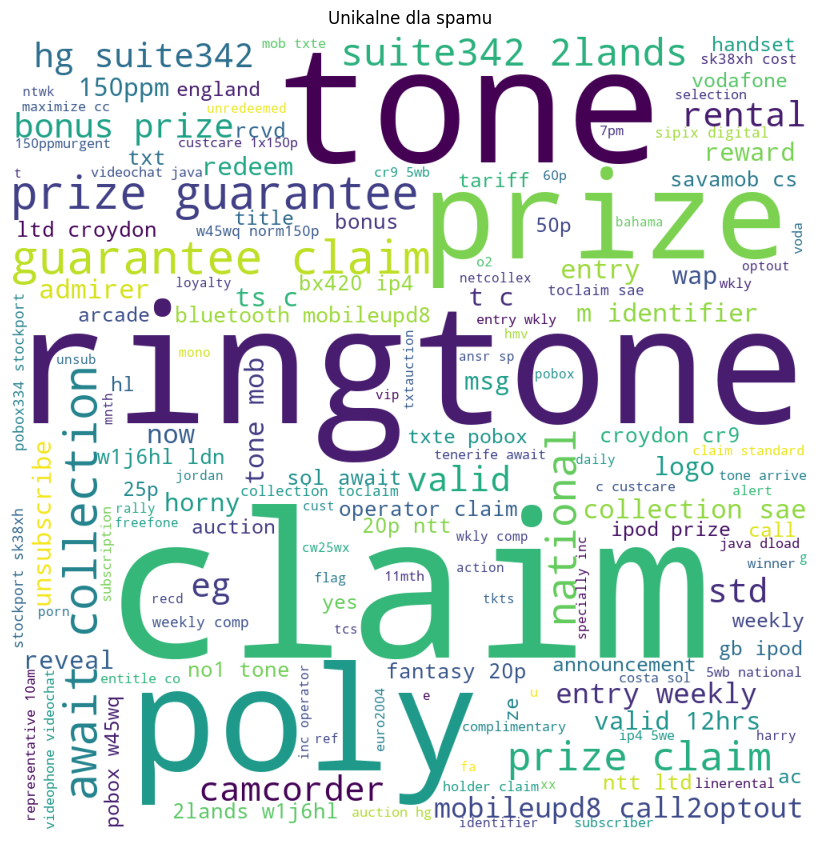

In [103]:
wordcloud(only_spam_words, 'Unikalne dla spamu', 'only_spam_wordcloud.png')

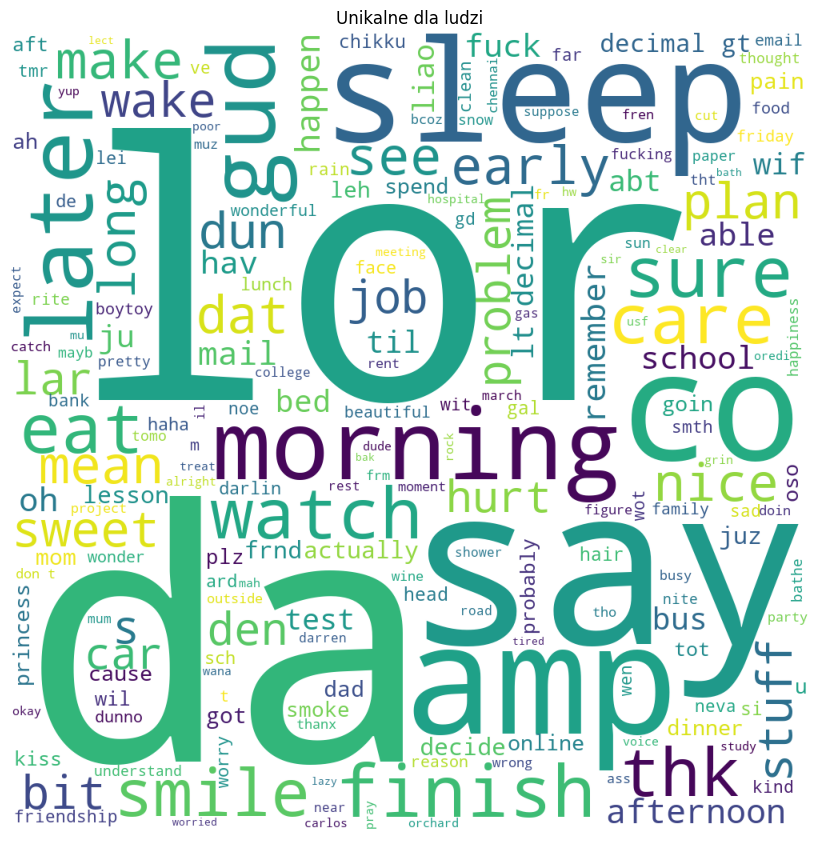

In [104]:
wordcloud(only_ham_words, 'Unikalne dla ludzi', 'only_ham_wordcloud.png')

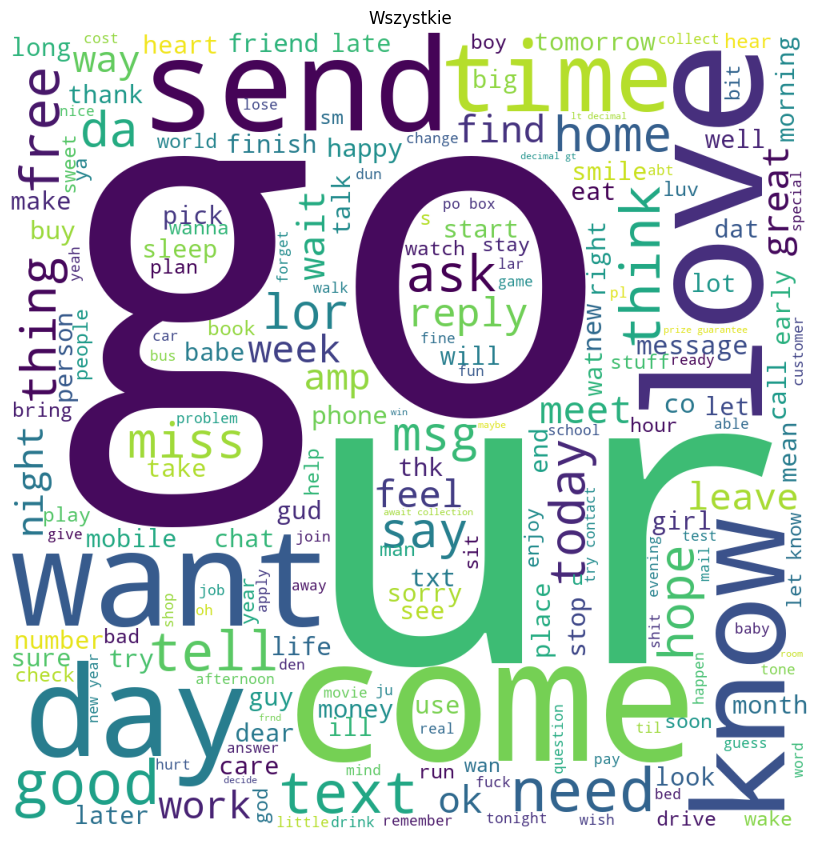

In [105]:
wordcloud(all_words, 'Wszystkie', 'all_wordcloud.png')